In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.mosaicplot as sp

In [4]:
df=pd.read_csv("C:\\Users\\chmgu\\Downloads\\archive (12)\\shopping_trends.csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [5]:
df.shape

(3900, 19)

In [6]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [7]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [11]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


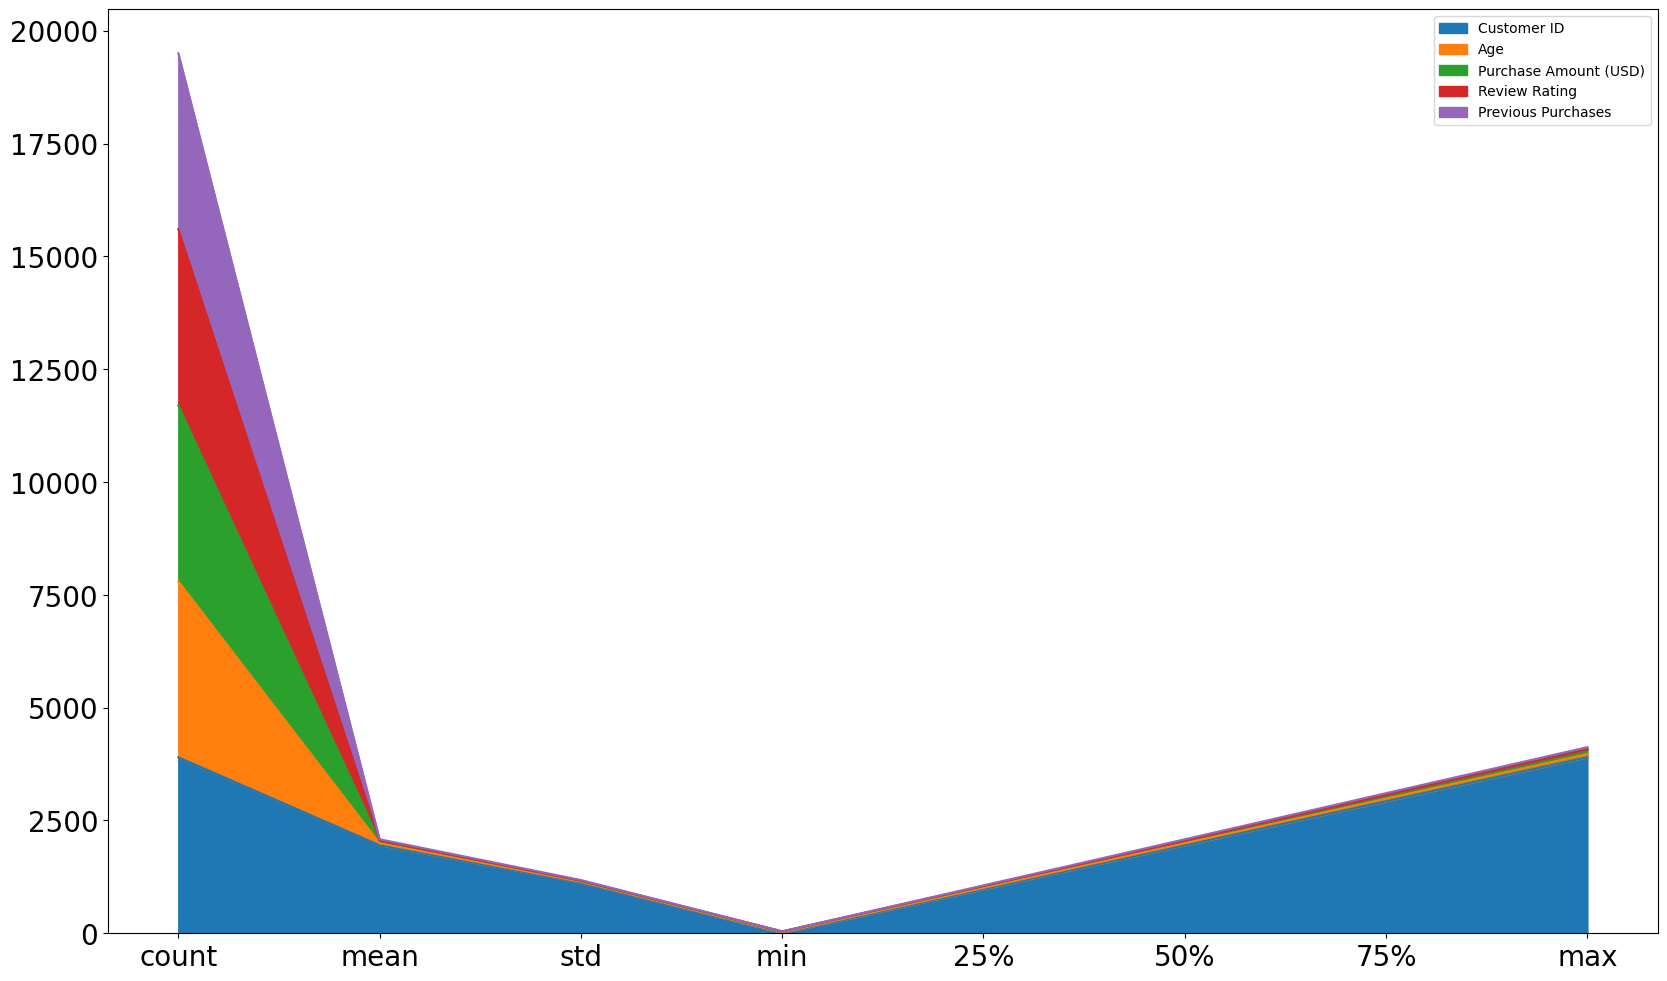

In [6]:
df.describe().plot(kind="area",fontsize=20,figsize=(20,12),table=False)
plt.show()

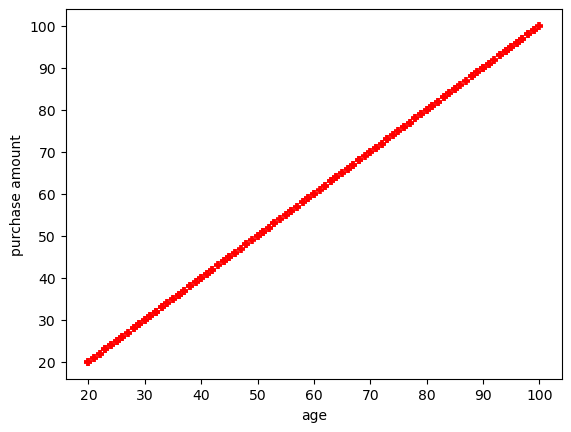

In [17]:
x=df['Review Rating']
x=df['Purchase Amount (USD)']
plt.xlabel('age')
plt.ylabel('purchase amount')
plt.scatter(x,y,color='red', s=30, marker='+')
plt.show()

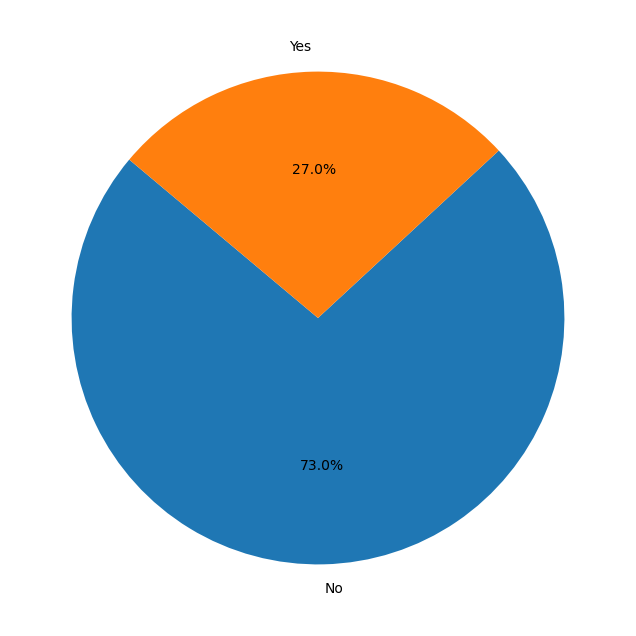

In [20]:
subscription_status = df['Subscription Status']
subscription_counts = subscription_status.value_counts()
labels = subscription_counts.index
sizes = subscription_counts.values
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.show()

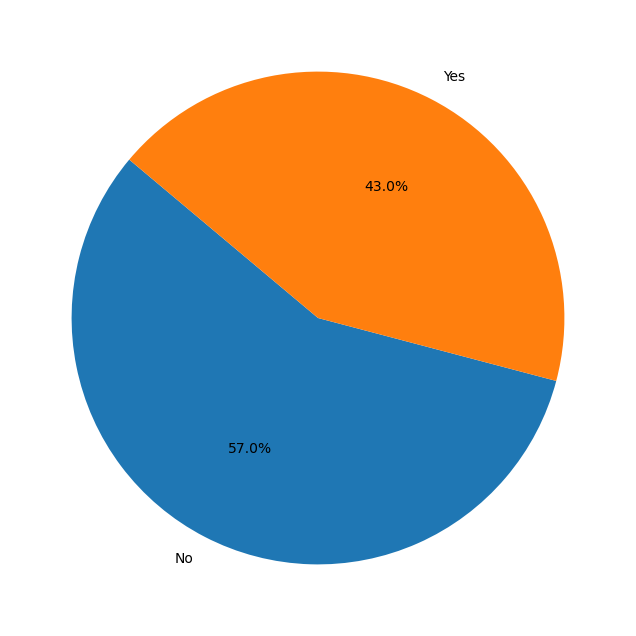

In [22]:
promocode_status = df['Promo Code Used']
promocode_counts = promocode_status.value_counts()
labels = promocode_counts.index
sizes = promocode_counts.values
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.show()

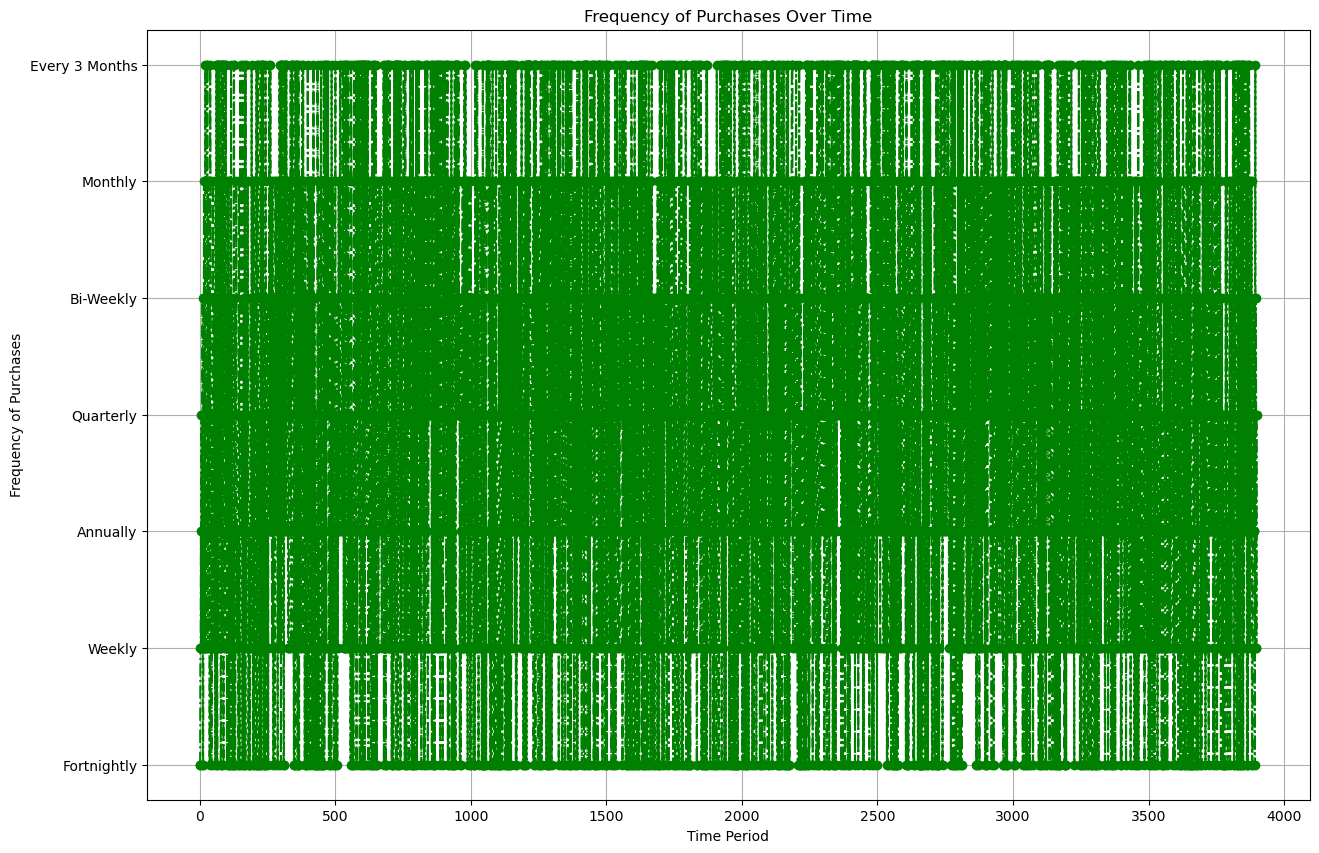

In [10]:
frequency_of_purchases = df['Frequency of Purchases']
plt.figure(figsize=(15, 10))
plt.plot(frequency_of_purchases, marker='o', linestyle='dashdot', color='g')
plt.xlabel('Time Period')
plt.ylabel('Frequency of Purchases')
plt.title('Frequency of Purchases Over Time')
plt.grid(True)  
plt.show()

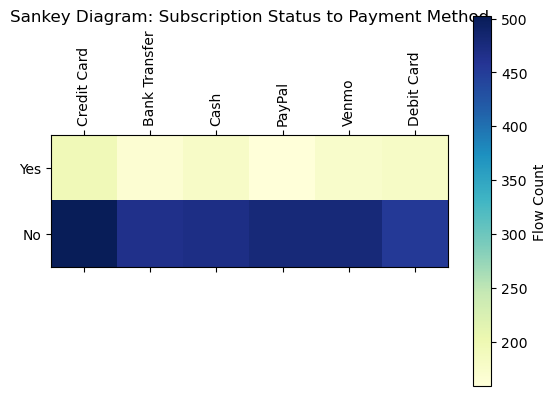

In [25]:
subscription_status1 = df['Subscription Status']
payment_method = df['Payment Method']
status_labels = {status: i for i, status in enumerate(subscription_status1.unique())}
method_labels = {method: i for i, method in enumerate(payment_method.unique())}
status_codes = [status_labels[status] for status in subscription_status1]
method_codes = [method_labels[method] for method in payment_method]
matrix = np.zeros((len(status_labels), len(method_labels)))
for i in range(len(df)):
    matrix[status_codes[i], method_codes[i]] += 1
fig, ax = plt.subplots()
sankey = ax.matshow(matrix, cmap='YlGnBu')
status_labels = list(status_labels.keys())
method_labels = list(method_labels.keys())
ax.set_xticks(np.arange(len(method_labels)))
ax.set_xticklabels(method_labels, rotation=90)
ax.set_yticks(np.arange(len(status_labels)))
ax.set_yticklabels(status_labels)
cbar = plt.colorbar(sankey)
cbar.set_label('Flow Count')
plt.title('Sankey Diagram: Subscription Status to Payment Method')
plt.show()

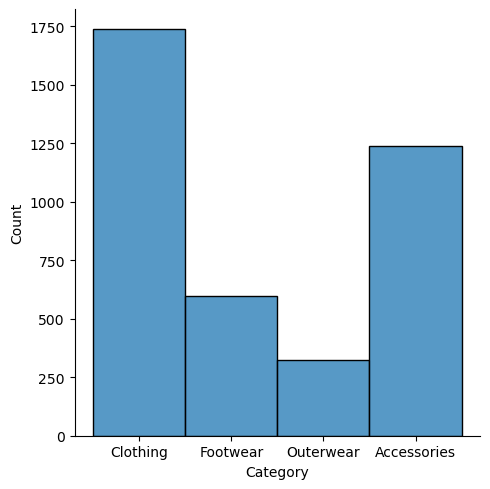

In [8]:
sns.displot(df['Category'])
plt.show()

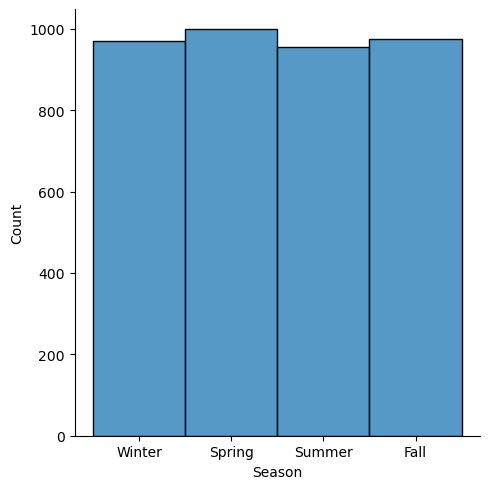

In [9]:
sns.displot(df['Season'])
plt.show()

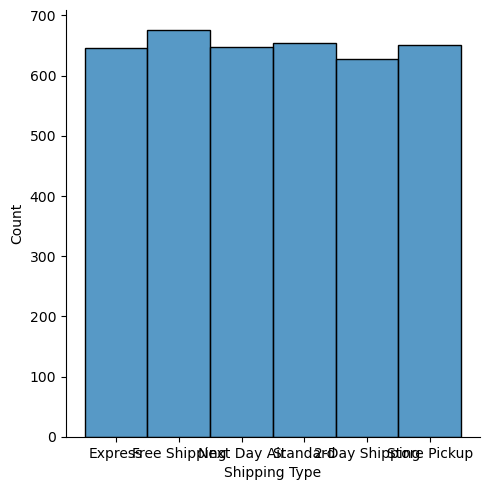

In [38]:

sns.displot(df['Shipping Type'])
plt.show()

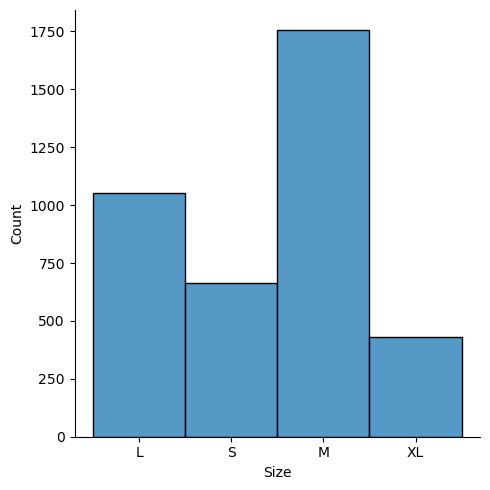

In [10]:
sns.displot(df['Size'])
plt.show()

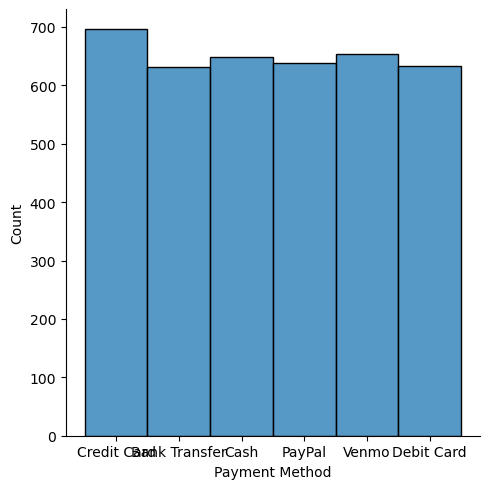

In [37]:
sns.displot(df['Payment Method'])
plt.show()

C:\Users\chmgu\AppData\Local\Temp\ipykernel_2972\2978478660.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Review Rating'])


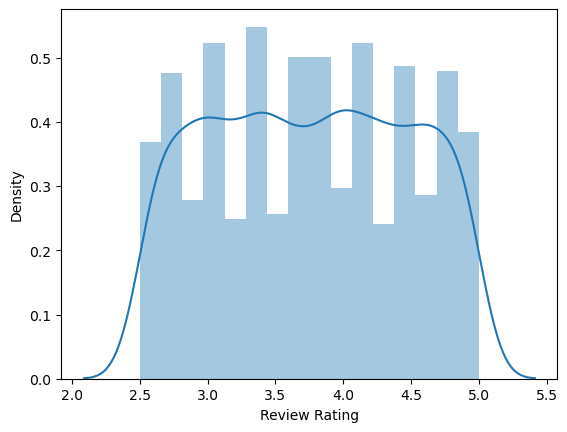

In [39]:
sns.distplot(df['Review Rating'])
plt.show()

# reviews according to the category

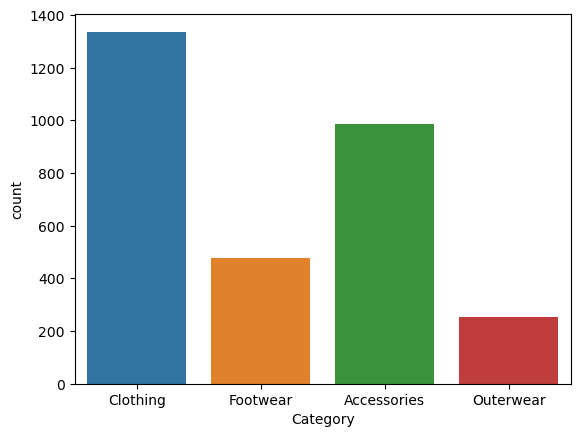

In [11]:
h=df[(df["Review Rating"]>3)]
sns.countplot(x='Category',data=h)
plt.show()

<Axes: xlabel='Category', ylabel='Count'>

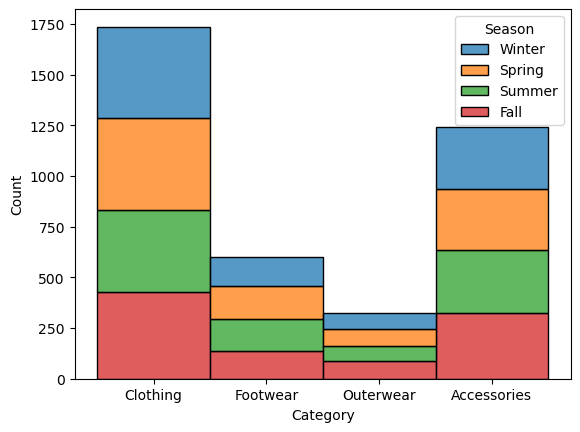

In [12]:
sns.histplot(x="Category",hue="Season",data=df,multiple="stack",stat="count")

<Axes: xlabel='Gender', ylabel='Count'>

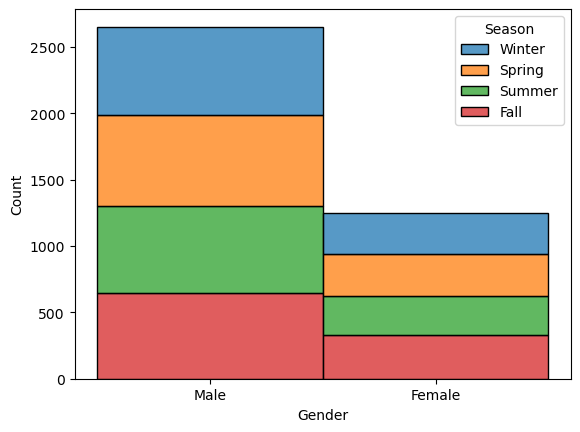

In [13]:
sns.histplot(binwidth=0.5,x="Gender",hue="Season",data=df,multiple="stack",stat="count")

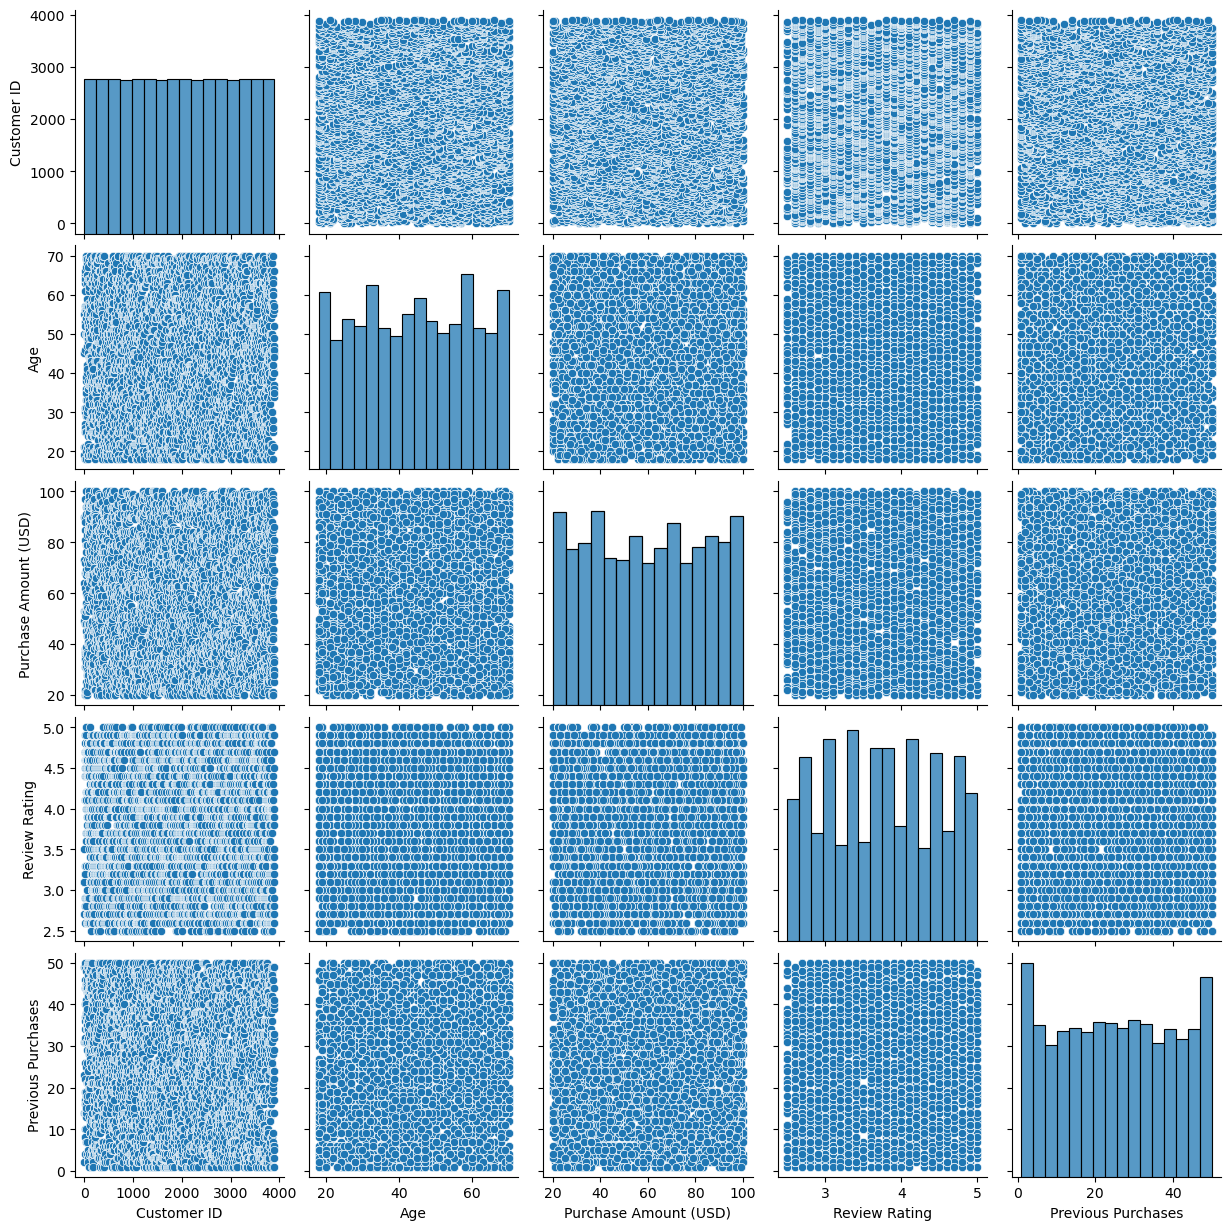

In [14]:
sns.pairplot(df)

C:\Users\chmgu\AppData\Local\Temp\ipykernel_2972\3769812938.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


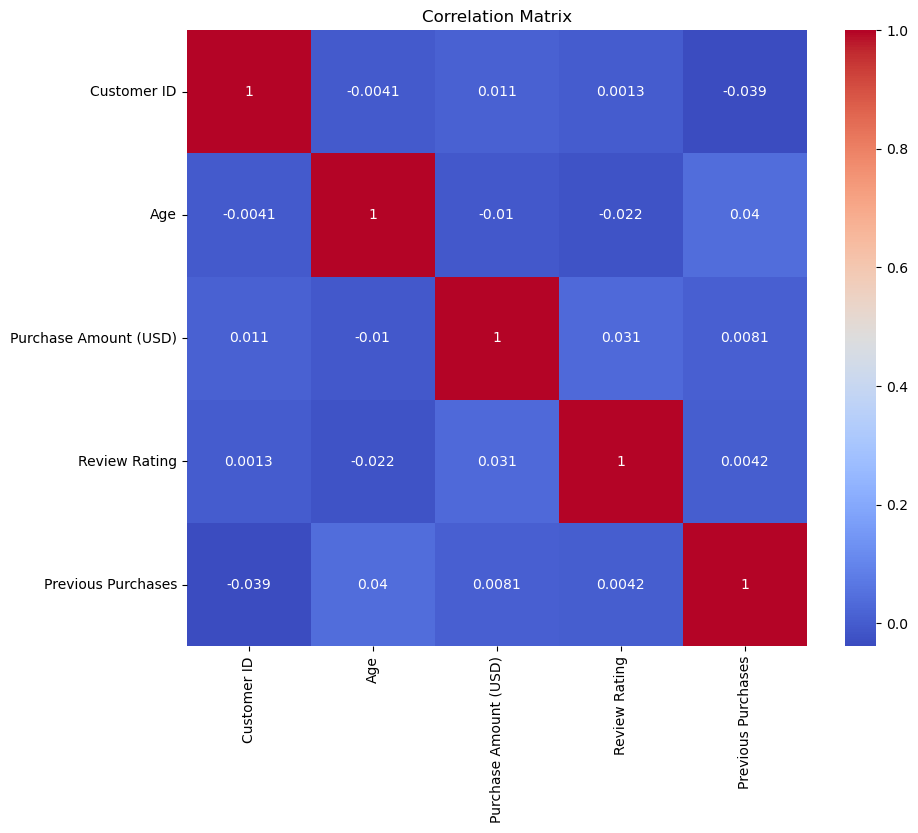

In [29]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

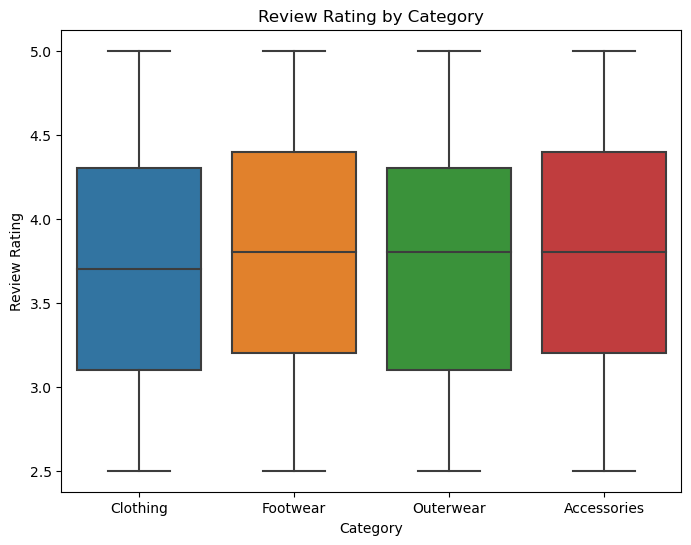

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Category', y='Review Rating')
plt.title('Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.show()

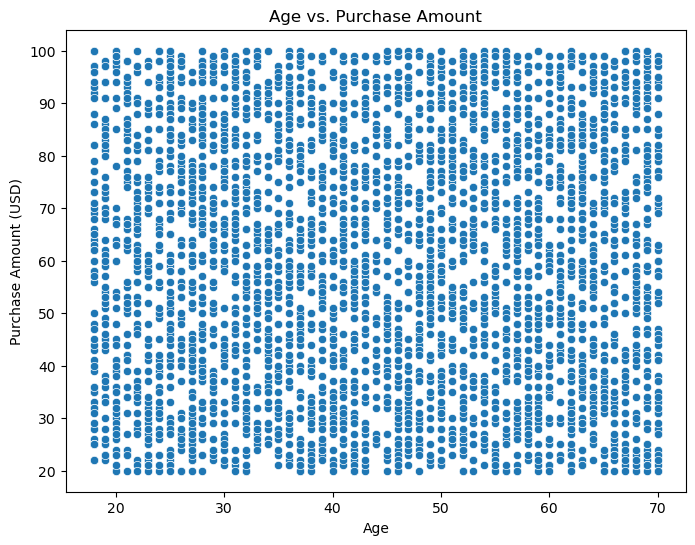

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Purchase Amount (USD)')
plt.title('Age vs. Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

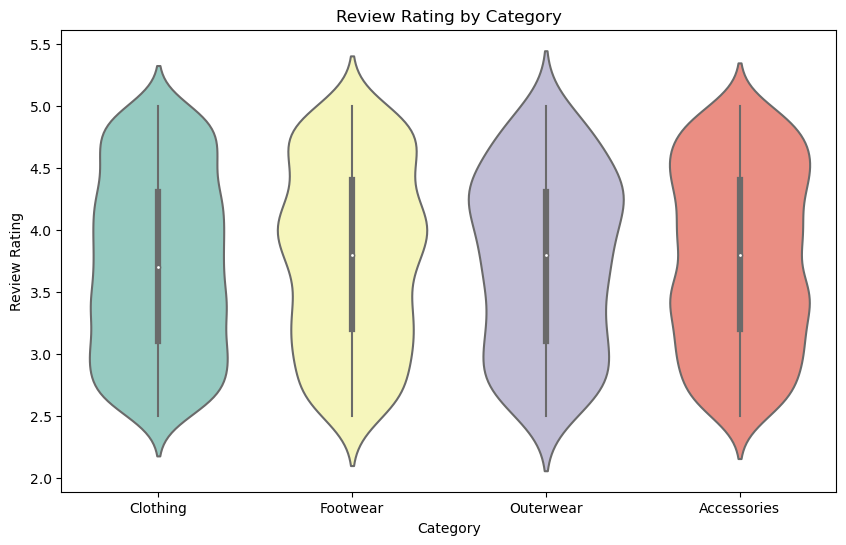

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Category', y='Review Rating', palette='Set3')
plt.title('Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Season', y='Review Rating')
plt.title('Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.show()

In [35]:
df['Location'].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [36]:
df.value_counts('Payment Method')

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
dtype: int64

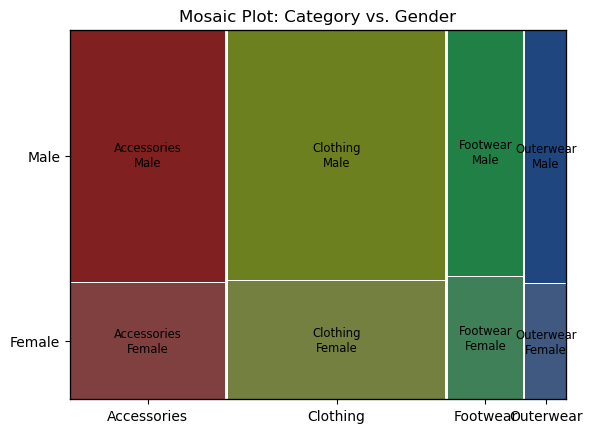

In [41]:
mosaic_data = pd.crosstab(df['Category'], df['Gender'])
sp.mosaic(mosaic_data.stack(), title='Mosaic Plot: Category vs. Gender')
plt.show()

In [42]:
!pip install geopy
!pip install folium

     ------------------------------------ 125.4/125.4 kB 526.1 kB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00
     ------------------------------------ 102.3/102.3 kB 368.2 kB/s eta 0:00:00


In [43]:
from geopy.geocoders import Nominatim

# Define your list of locations
locations = [
    'Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon', 'Wyoming', 'Montana', 'Louisiana', 'West Virginia',
    'Missouri', 'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York', 'Alabama', 'Mississippi', 'North Carolina',
    'California', 'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado', 'North Dakota', 'Illinois', 'Indiana',
    'Arizona', 'Alaska', 'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont', 'New Mexico', 'South Carolina', 'Idaho',
    'Pennsylvania', 'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa', 'South Dakota', 'Minnesota',
    'Washington', 'Wisconsin', 'Michigan'
]

# Initialize the geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Create a dictionary to store the coordinates
coordinates = {}

for location in locations:
    location_info = geolocator.geocode(location)
    if location_info:
        coordinates[location] = (location_info.latitude, location_info.longitude)

print(coordinates)

{'Kentucky': (37.5726028, -85.1551411), 'Maine': (45.709097, -68.8590201), 'Massachusetts': (42.3788774, -72.032366), 'Rhode Island': (41.7962409, -71.5992372), 'Oregon': (43.9792797, -120.737257), 'Wyoming': (43.1700264, -107.568534), 'Montana': (47.3752671, -109.638757), 'Louisiana': (30.8703881, -92.007126), 'West Virginia': (38.4758406, -80.8408415), 'Missouri': (38.7604815, -92.5617875), 'Arkansas': (35.2048883, -92.4479108), 'Hawaii': (19.593801499999998, -155.42837009716908), 'Delaware': (38.6920451, -75.4013315), 'New Hampshire': (43.4849133, -71.6553992), 'New York': (40.7127281, -74.0060152), 'Alabama': (33.2588817, -86.8295337), 'Mississippi': (32.9715285, -89.7348497), 'North Carolina': (35.6729639, -79.0392919), 'California': (36.7014631, -118.755997), 'Oklahoma': (34.9550817, -97.2684063), 'Florida': (27.7567667, -81.4639835), 'Texas': (31.2638905, -98.5456116), 'Nevada': (39.5158825, -116.8537227), 'Kansas': (38.27312, -98.5821872), 'Colorado': (38.7251776, -105.607716),

In [44]:
import folium

# Initialize the map
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # Using approximate center of the United States

# Add markers for each location
for location, coords in coordinates.items():
    folium.Marker(
        location=coords,
        popup=location
    ).add_to(m)

# Save the map as an HTML file
m.save('customer_locations_map.html')